<a href="https://colab.research.google.com/github/Lingesh15/Machine-Learning/blob/main/DataPRP_FOR_MELANOMA_CLINICAL_IMGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00


In [3]:
!python -m ipykernel install --user --name=myenv

Installed kernelspec myenv in /root/.local/share/jupyter/kernels/myenv


In [4]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [5]:
!git clone https://github.com/jeremykawahara/derm7pt.git

Cloning into 'derm7pt'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 122 (delta 8), reused 24 (delta 6), pack-reused 92
Receiving objects: 100% (122/122), 405.57 KiB | 4.41 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [6]:
!pip install scikit-learn


In [7]:
!pip install --upgrade setuptools pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2


In [ ]:
!pip install git+https://github.com/Lingesh15/derm7pt.git

  Cloning https://github.com/Lingesh15/derm7pt.git to /tmp/pip-req-build-osvfjcop
  Running command git clone --filter=blob:none --quiet https://github.com/Lingesh15/derm7pt.git /tmp/pip-req-build-osvfjcop
  Resolved https://github.com/Lingesh15/derm7pt.git to commit ca0a714d22b857b2574d7386602878ba127259f9
  Preparing metadata (setup.py) ... done


In [ ]:
import sys, os
import pandas as pd
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..'))) # To import derm7pt
from derm7pt.dataset import Derm7PtDatasetGroupInfrequent

In [ ]:
dir_release = '/content/drive/MyDrive/release_v0/release_v0'

In [ ]:
derm_data = Derm7PtDatasetGroupInfrequent(
    dir_images=os.path.join(dir_release, 'images'),
    metadata_df=pd.read_csv(os.path.join(dir_release, 'meta/meta.csv')),
    train_indexes=list(pd.read_csv(os.path.join(dir_release, 'meta/train_indexes.csv'))['indexes']),
    valid_indexes=list(pd.read_csv(os.path.join(dir_release, 'meta/valid_indexes.csv'))['indexes']),
    test_indexes=list(pd.read_csv(os.path.join(dir_release, 'meta/test_indexes.csv'))['indexes']))

<ipython-input-21-7c106a8118df>:1: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  derm_data = Derm7PtDatasetGroupInfrequent(


In [ ]:
derm_data.df.head(n=5)

,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,...,case_id,notes,diagnosis_numeric,pigment_network_numeric,blue_whitish_veil_numeric,vascular_structures_numeric,pigmentation_numeric,streaks_numeric,dots_and_globules_numeric,regression_structures_numeric
0,1,basal cell carcinoma,0,absent,absent,absent,absent,absent,absent,arborizing,...,NaN,NaN,0,0,0,1,0,0,0,0
1,2,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,absent,...,NaN,NaN,0,0,0,0,0,0,2,0
2,3,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,arborizing,...,NaN,NaN,0,0,0,1,0,0,2,0
3,4,basal cell carcinoma,4,absent,absent,absent,blue areas,irregular,present,within regression,...,NaN,NaN,0,0,1,1,0,0,2,1
4,5,basal cell carcinoma,1,absent,absent,diffuse irregular,absent,absent,absent,absent,...,NaN,NaN,0,0,0,0,2,0,0,0


In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
import pandas as pd
pd.set_option('display.max_columns', 500)
import sys, os
from sklearn.linear_model import LogisticRegression
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from derm7pt.dataset import Derm7PtDataset, Derm7PtDatasetGroupInfrequent
from derm7pt.vis import plot_confusion
from derm7pt.kerasutils import deep_features

In [ ]:
dir_release = '/content/drive/MyDrive/release_v0/release_v0'
dir_meta = os.path.join(dir_release, 'meta')
dir_images = os.path.join(dir_release, 'images')

In [ ]:
meta_df = pd.read_csv(os.path.join(dir_meta, 'meta.csv'))
train_indexes = list(pd.read_csv(os.path.join(dir_meta, 'train_indexes.csv'))['indexes'])
valid_indexes = list(pd.read_csv(os.path.join(dir_meta, 'valid_indexes.csv'))['indexes'])
test_indexes = list(pd.read_csv(os.path.join(dir_meta, 'test_indexes.csv'))['indexes'])

In [ ]:
derm_data = Derm7PtDataset(dir_images=dir_images,
                        metadata_df=meta_df.copy(),
                        train_indexes=train_indexes, valid_indexes=valid_indexes,
                        test_indexes=test_indexes)

derm_data_group = Derm7PtDatasetGroupInfrequent(dir_images=dir_images,
                                             metadata_df=meta_df.copy(),
                                             train_indexes=train_indexes,
                                             valid_indexes=valid_indexes,
                                             test_indexes=test_indexes)

<ipython-input-64-5943828bf68c>:1: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  derm_data = Derm7PtDataset(dir_images=dir_images,
<ipython-input-64-5943828bf68c>:6: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  derm_data_group = Derm7PtDatasetGroupInfrequent(dir_images=dir_images,


In [ ]:
derm_data.dataset_stats()

Number of cases: 1011
Number of cases to train: 413
Number of cases to validate: 203
Number of cases to test: 395


In [ ]:
derm_data_group.df.head()

,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm,case_id,notes,diagnosis_numeric,pigment_network_numeric,blue_whitish_veil_numeric,vascular_structures_numeric,pigmentation_numeric,streaks_numeric,dots_and_globules_numeric,regression_structures_numeric
0,1,basal cell carcinoma,0,absent,absent,absent,absent,absent,absent,arborizing,medium,nodular,abdomen,female,excision,NEL/NEL025.JPG,NEL/Nel026.jpg,NaN,NaN,0,0,0,1,0,0,0,0
1,2,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,absent,low,palpable,head neck,female,excision,NEL/NEL027.JPG,NEL/Nel028.jpg,NaN,NaN,0,0,0,0,0,0,2,0
2,3,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,arborizing,medium,palpable,head neck,female,excision,NEL/Nel032.jpg,NEL/Nel033.jpg,NaN,NaN,0,0,0,1,0,0,2,0
3,4,basal cell carcinoma,4,absent,absent,absent,blue areas,irregular,present,within regression,low,palpable,lower limbs,male,excision,NEL/NEL034.JPG,NEL/Nel035.jpg,NaN,NaN,0,0,1,1,0,0,2,1
4,5,basal cell carcinoma,1,absent,absent,diffuse irregular,absent,absent,absent,absent,high,palpable,upper limbs,female,excision,NEL/NEL036.JPG,NEL/Nel037.jpg,NaN,NaN,0,0,0,0,2,0,0,0


case_num                                             4
diagnosis                         basal cell carcinoma
seven_point_score                                    4
pigment_network                                 absent
streaks                                         absent
pigmentation                                    absent
regression_structures                       blue areas
dots_and_globules                            irregular
blue_whitish_veil                              present
vascular_structures                  within regression
level_of_diagnostic_difficulty                     low
elevation                                     palpable
location                                   lower limbs
sex                                               male
management                                    excision
clinic                                  NEL/NEL034.JPG
derm                                    NEL/Nel035.jpg
case_id                                            NaN
notes     

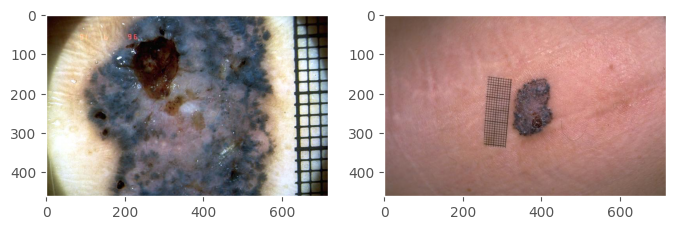

In [ ]:
row_index = 3
derm = derm_data_group.derm_image(row_index=row_index)
clinic = derm_data_group.clinic_image(row_index=row_index)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(derm)
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(clinic)
plt.grid(False)
# Show the corresponding info.
print(derm_data_group.df.iloc[row_index])

In [ ]:
train_derm_paths = derm_data_group.get_img_paths(data_type='train', img_type='derm')
train_clinic_paths = derm_data_group.get_img_paths(data_type='train', img_type='clinic')
train_labels = derm_data_group.get_labels(data_type='train', one_hot=False)

print(train_labels.keys())

dict_keys(['DIAG', 'PN', 'BWV', 'VS', 'PIG', 'STR', 'DaG', 'RS'])


In [ ]:
test_derm_paths = derm_data_group.get_img_paths(data_type='test', img_type='derm')
test_clinic_paths = derm_data_group.get_img_paths(data_type='test', img_type='clinic')
test_labels = derm_data_group.get_labels(data_type='test', one_hot=False)

In [ ]:
valid_derm_paths = derm_data_group.get_img_paths(data_type='valid', img_type='derm')
print(len(valid_derm_paths))

203


In [ ]:
from keras.applications.mobilenet import MobileNet, preprocess_input
input_shape = (224, 224, 3)
model = MobileNet(include_top=False, input_shape=input_shape)

In [ ]:
crop_amount= 25

In [1]:
train_derm_f = deep_features(img_paths=train_derm_paths, model=model,
                             func_preprocess_input=preprocess_input,
                             target_size=input_shape, crop_amount=crop_amount)

NameError: name 'deep_features' is not defined